In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [3]:
air = pd.read_excel('Airlines+Data.xlsx')

In [4]:
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
air.isnull().sum()

Month         0
Passengers    0
dtype: int64

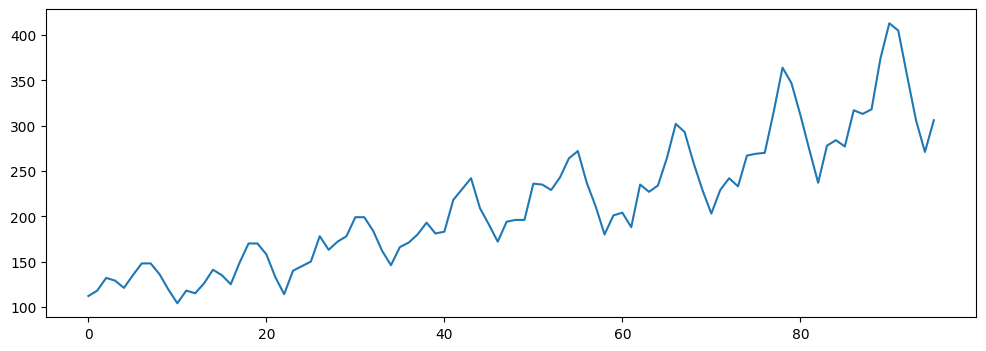

In [6]:
air.Passengers.plot(figsize=(12,4));


In [7]:
air.shape

(96, 2)

In [8]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [10]:
air.rename({'Month':'Date'}, axis=1, inplace=True)

In [11]:
air.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [12]:
airline = air.copy()
airline.set_index('Date', inplace=True)
airline.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [13]:
airline.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [14]:
air["Date"]  = pd.to_datetime(air.Date, format="%b-%y")
air["month"] = air.Date.dt.strftime("%b") # month extraction
air["year"]  = air.Date.dt.strftime("%Y") # year extraction
air.head(10)

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


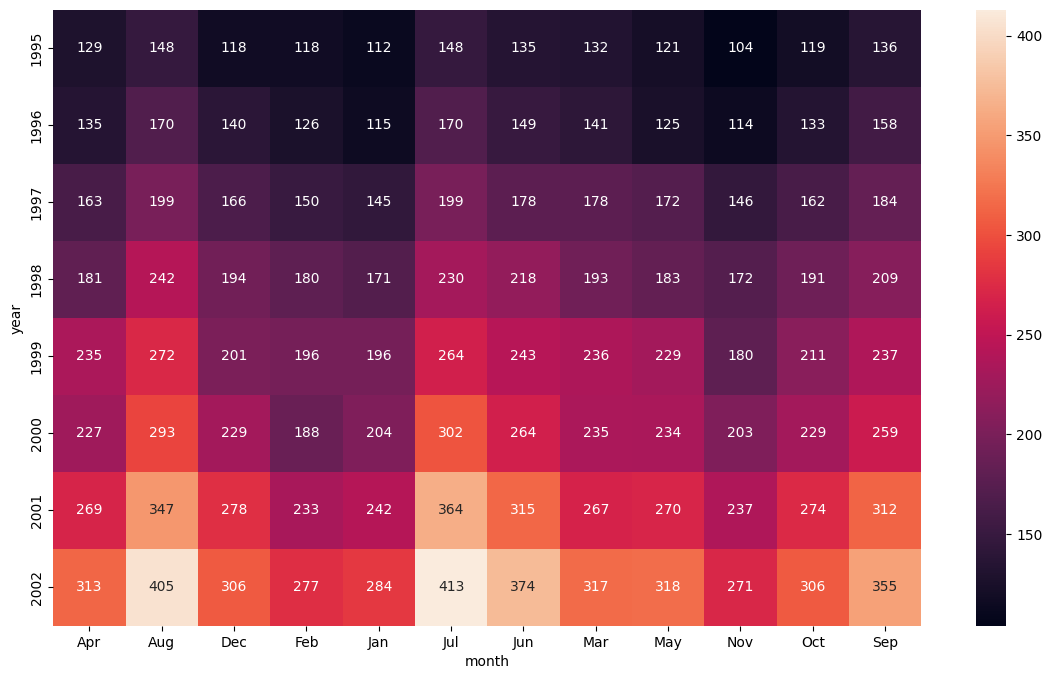

In [15]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

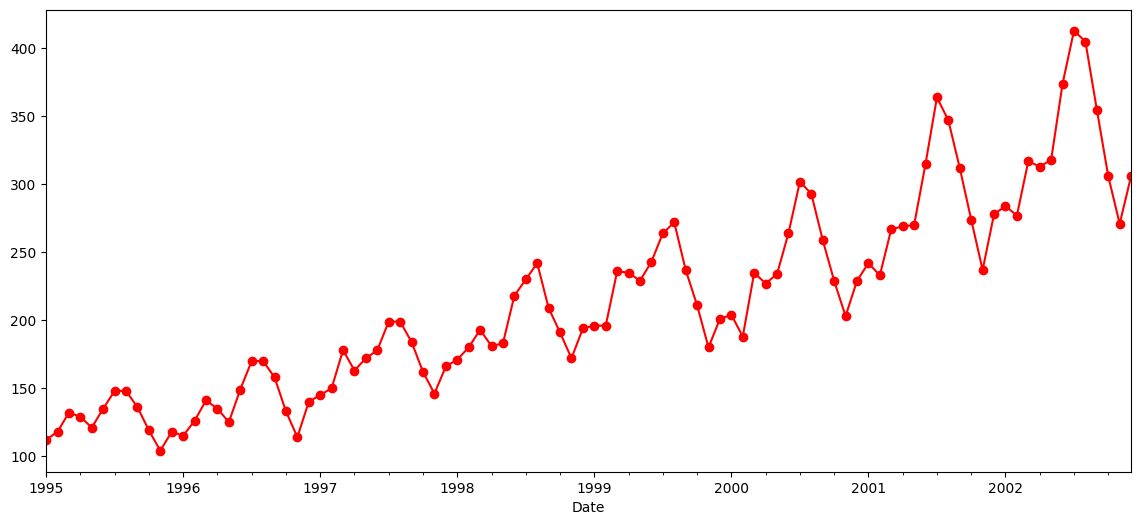

In [18]:
airline['Passengers'].plot(figsize=(14,6),color='red',marker='o')
plt.show()

In [ ]:
# We can see that there is an increasing Trend. So, Trend is not constant.
# Variance is also not constant.Hence the time series is not stationary.

<Axes: xlabel='year', ylabel='Passengers'>

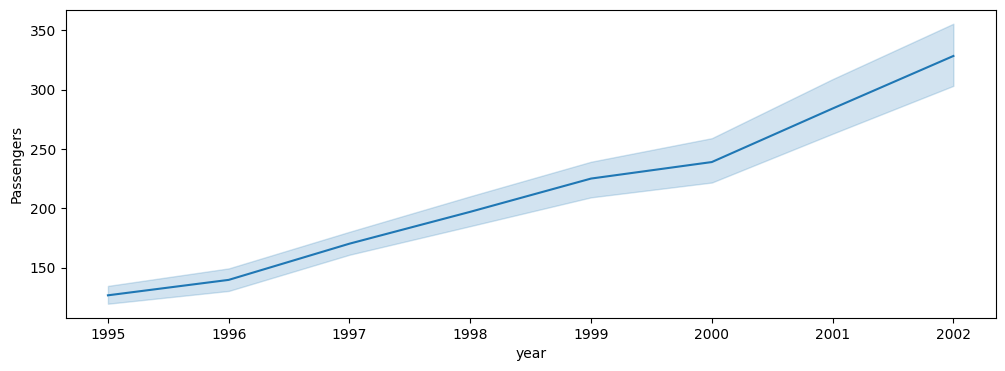

In [17]:
plt.figure(figsize=(12,4))
sns.lineplot(x="year", y="Passengers", data=air)

<Axes: xlabel='month', ylabel='Passengers'>

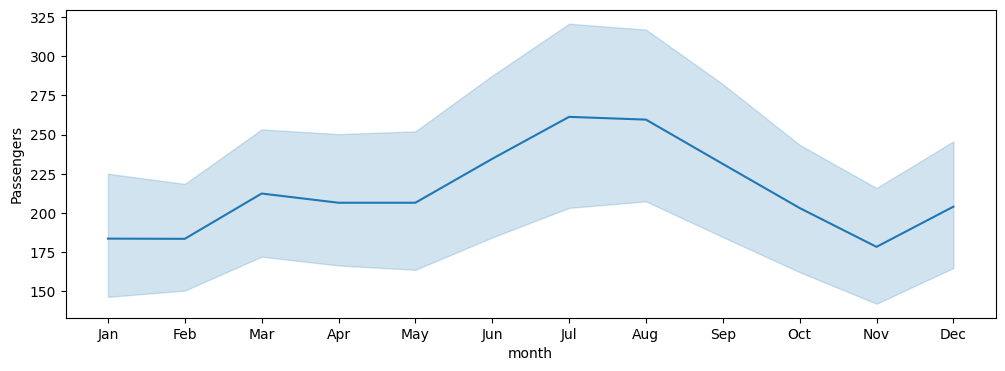

In [19]:
plt.figure(figsize=(12,4))
sns.lineplot(x="month", y="Passengers", data=air)

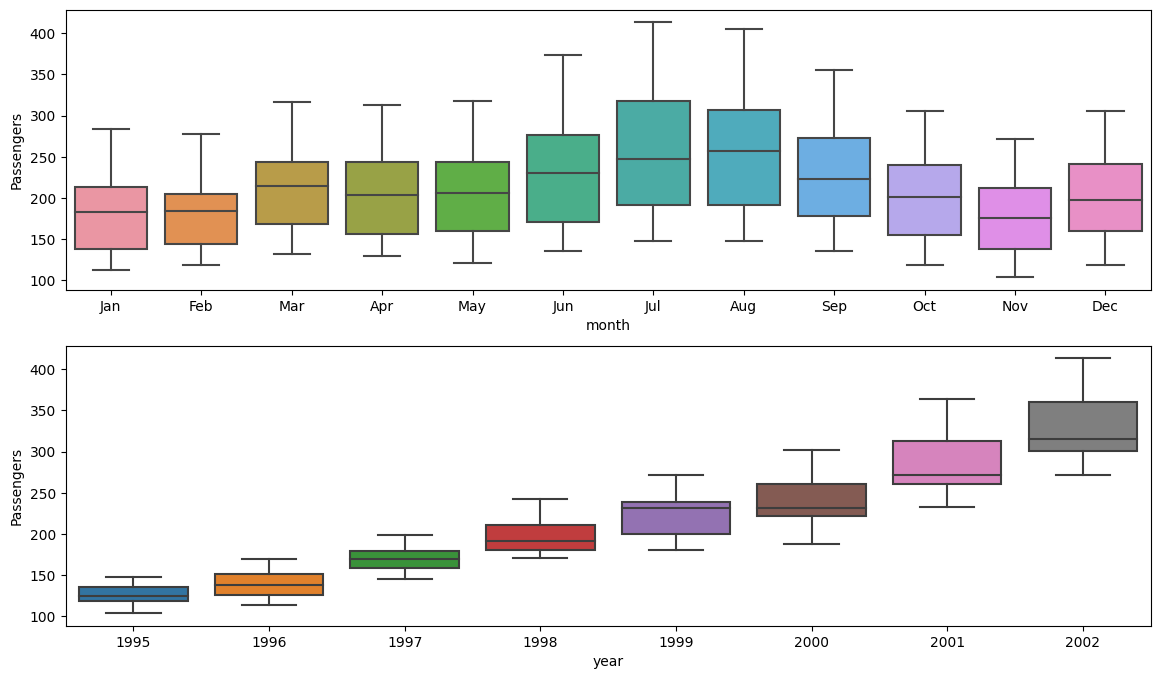

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month", y="Passengers", data=air)
plt.subplot(212)
sns.boxplot(x="year", y="Passengers", data=air)
plt.show()

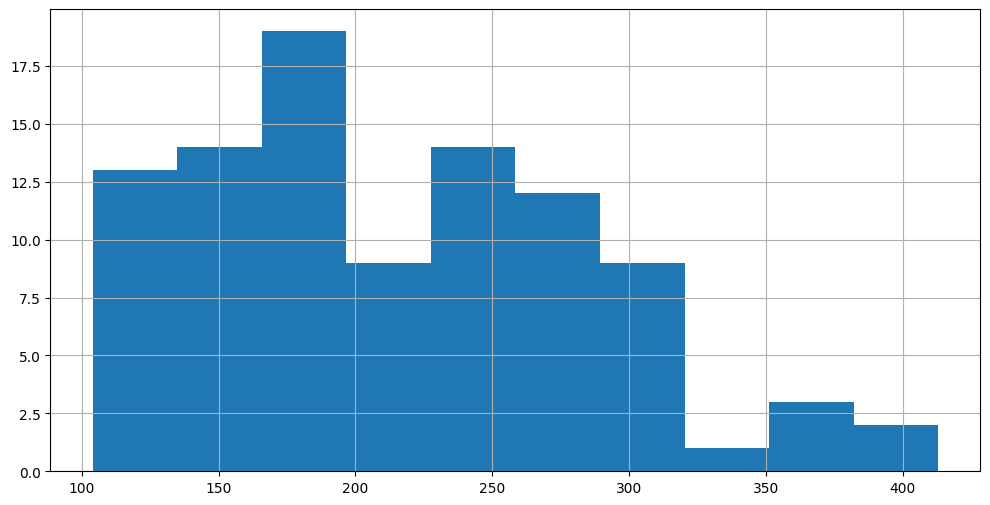

In [ ]:
air.Passengers.hist(figsize=(12,6))
plt.show()

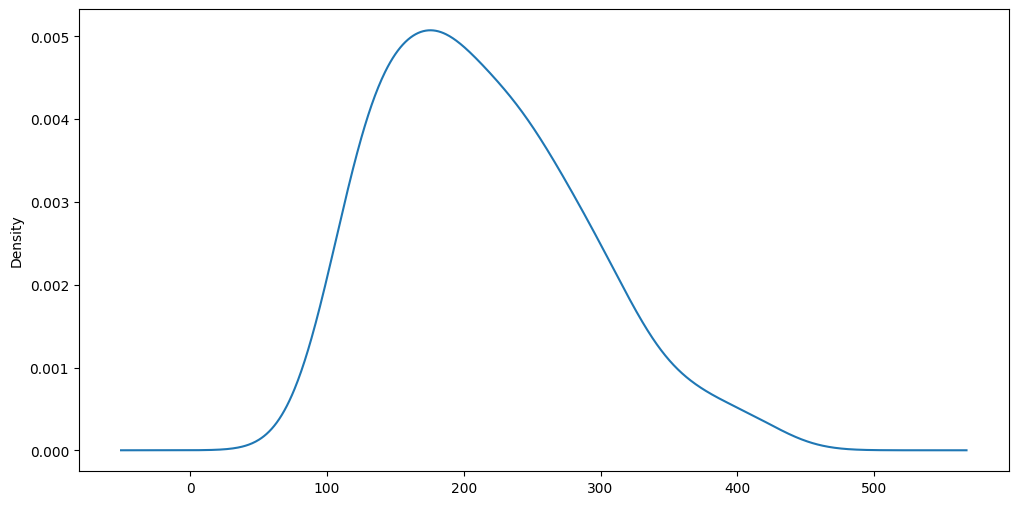

In [ ]:
air.Passengers.plot(kind='kde', figsize=(12,6))
plt.show()

In [ ]:
# Lag plot

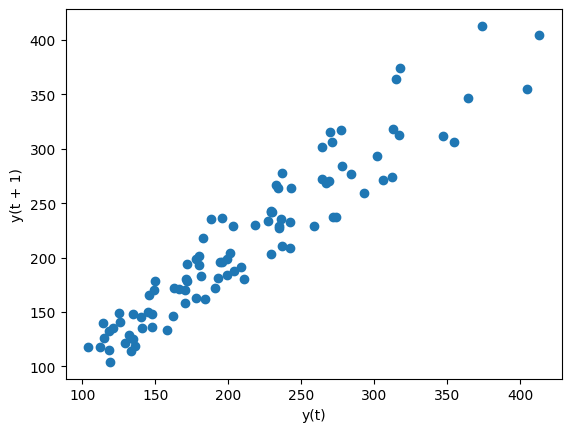

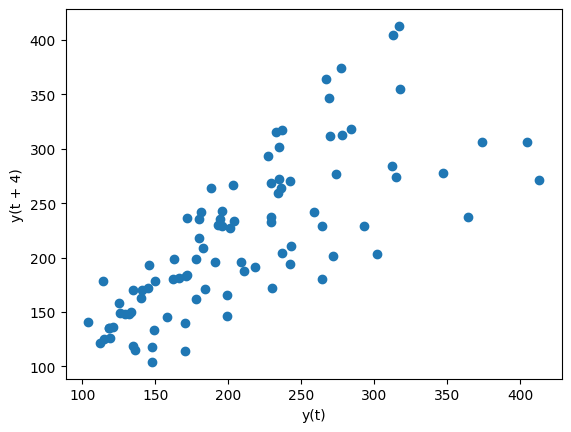

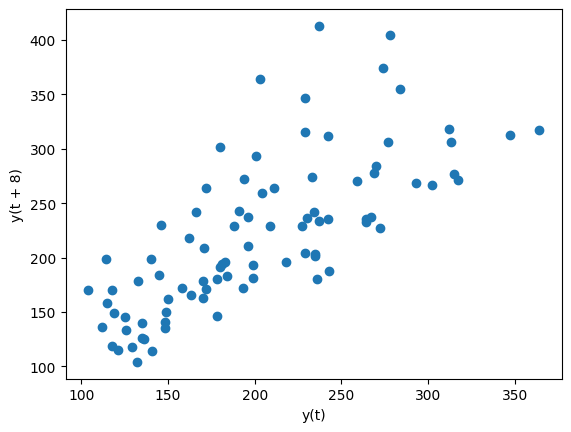

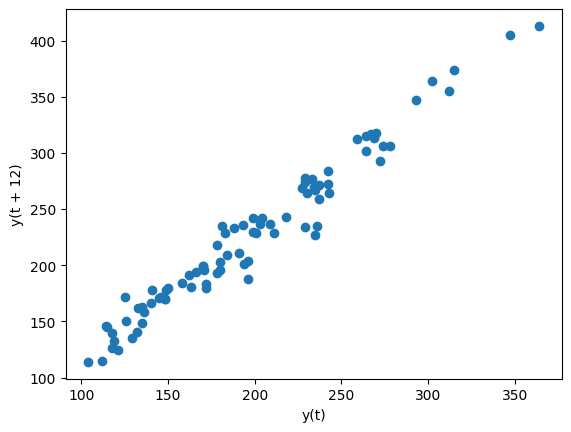

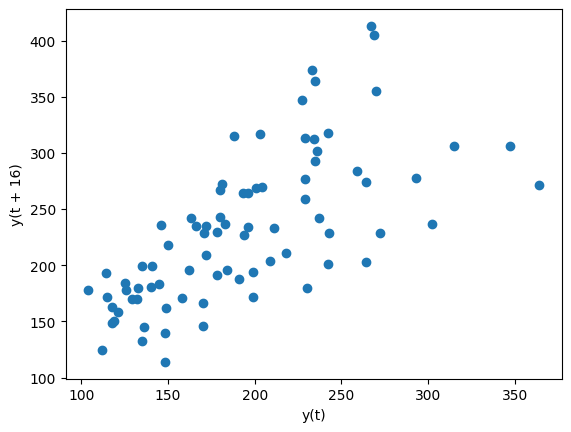

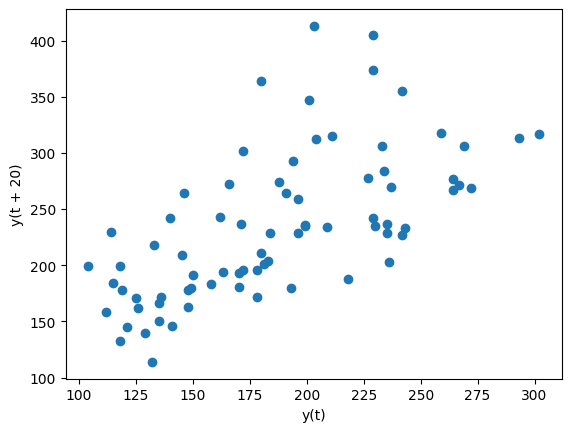

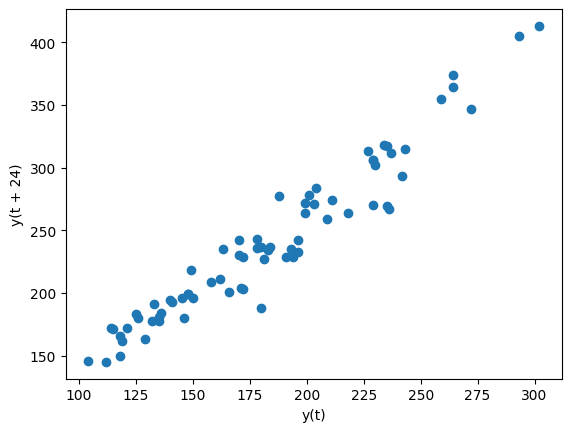

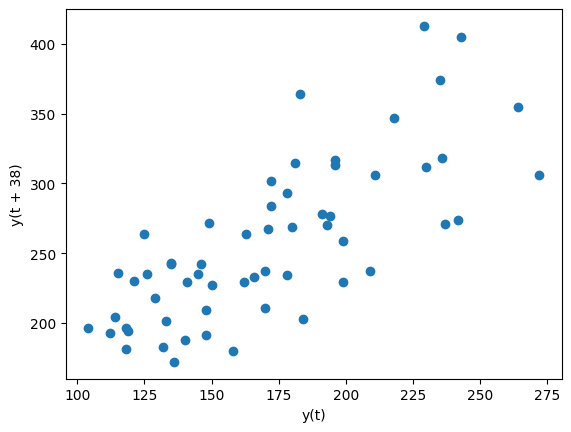

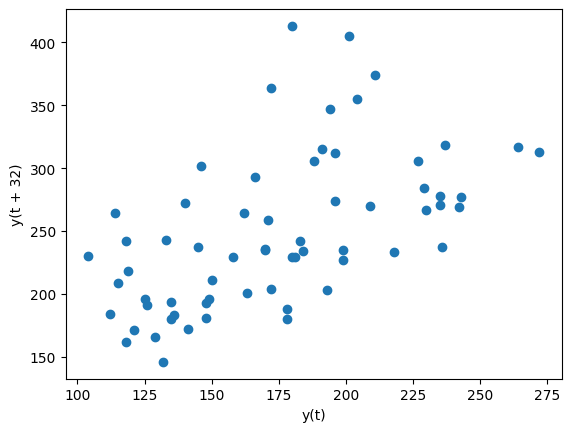

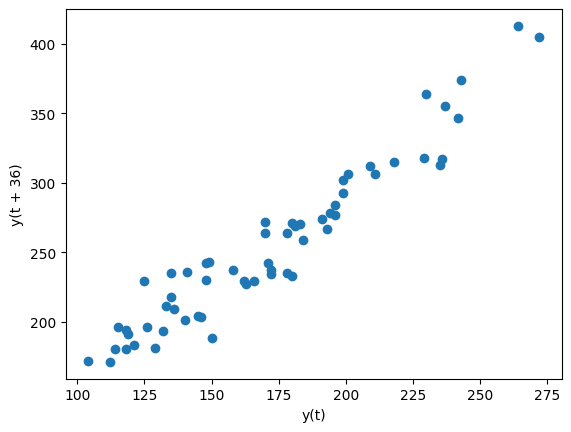

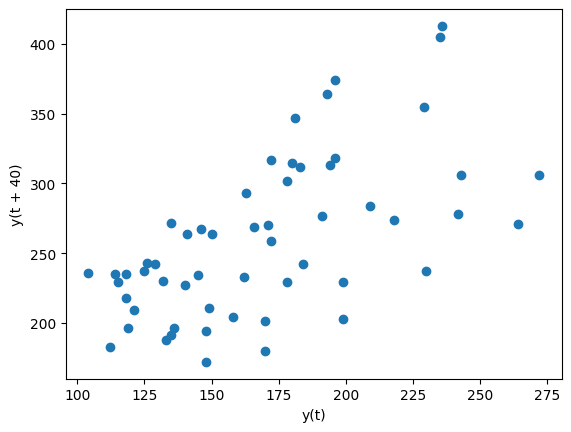

In [ ]:
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(12,8))
    lag_plot(air.Passengers, lag=i)
    plt.show()

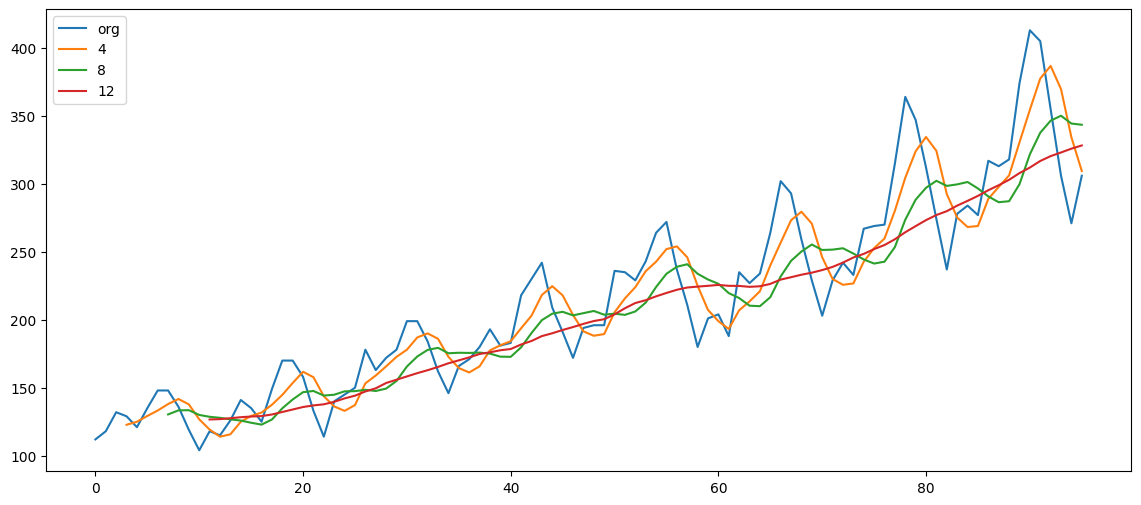

In [ ]:
plt.figure(figsize=(14,6))
air.Passengers.plot(label="org")
for i in range(4,13,4):
    air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

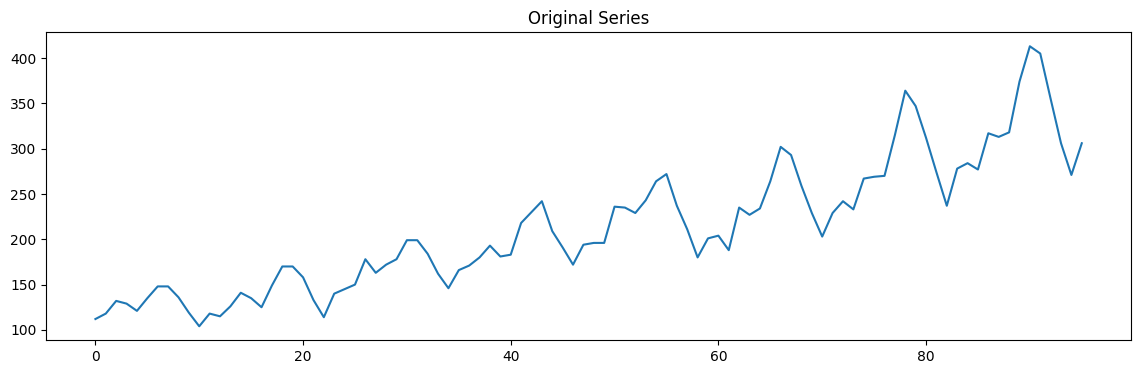

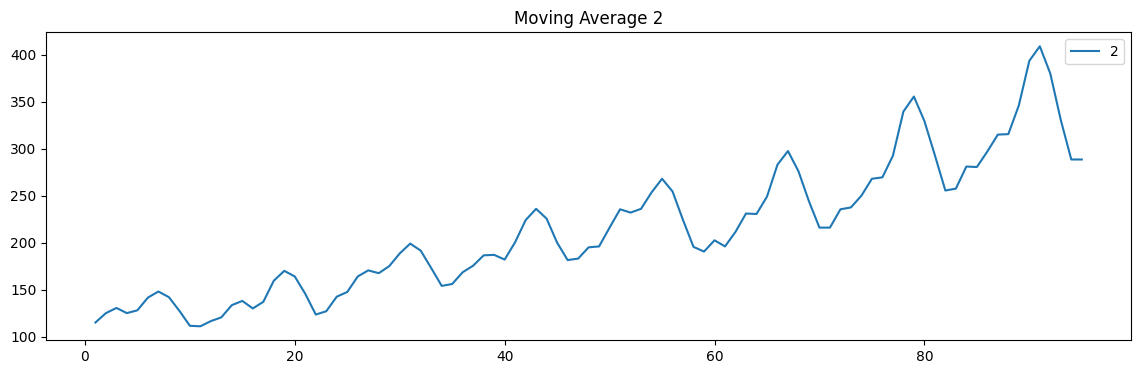

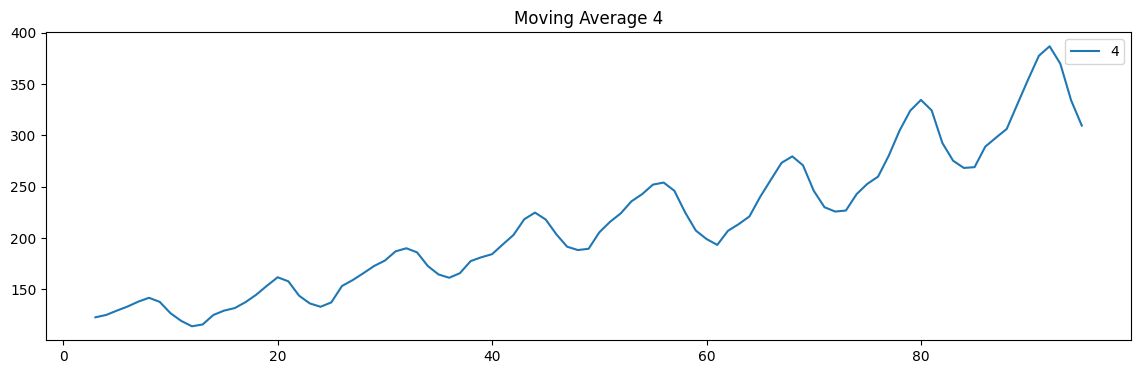

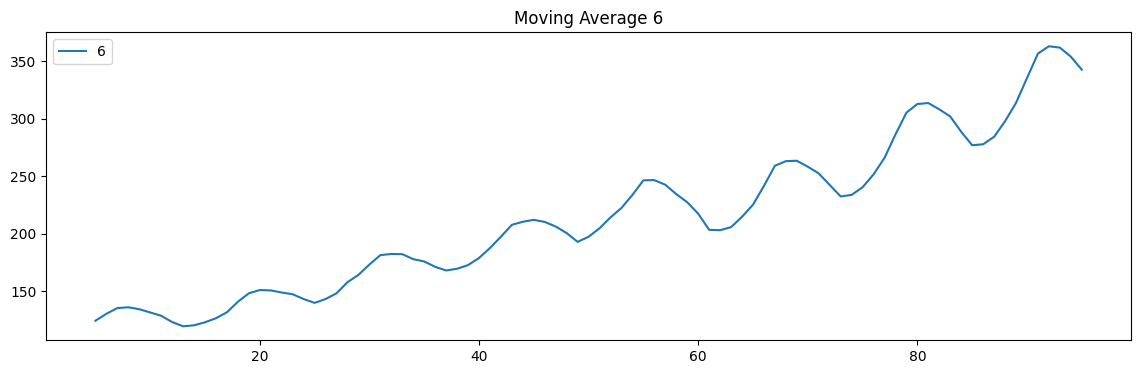

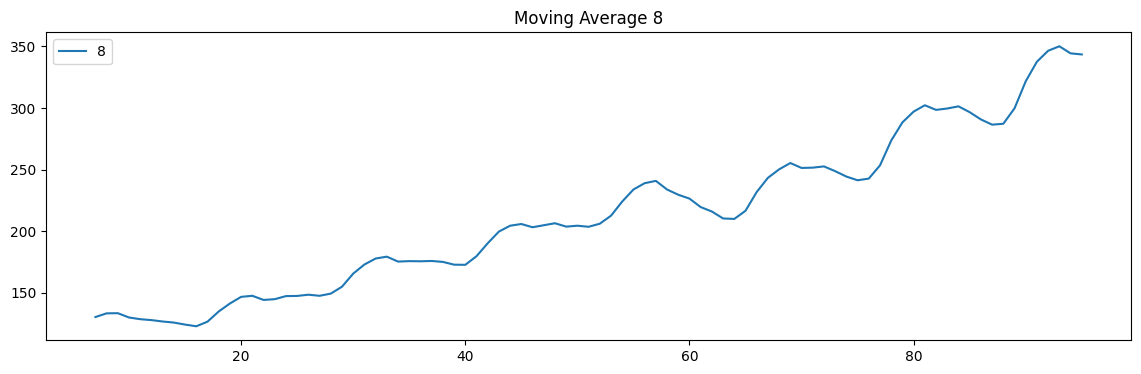

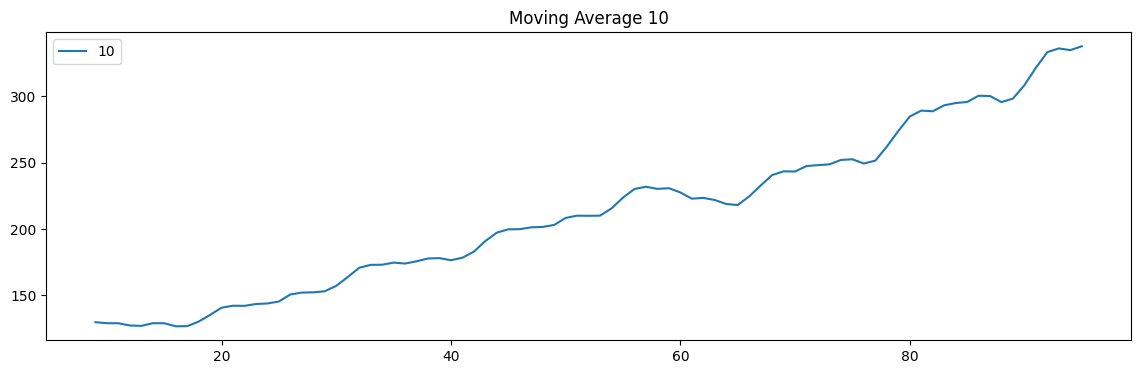

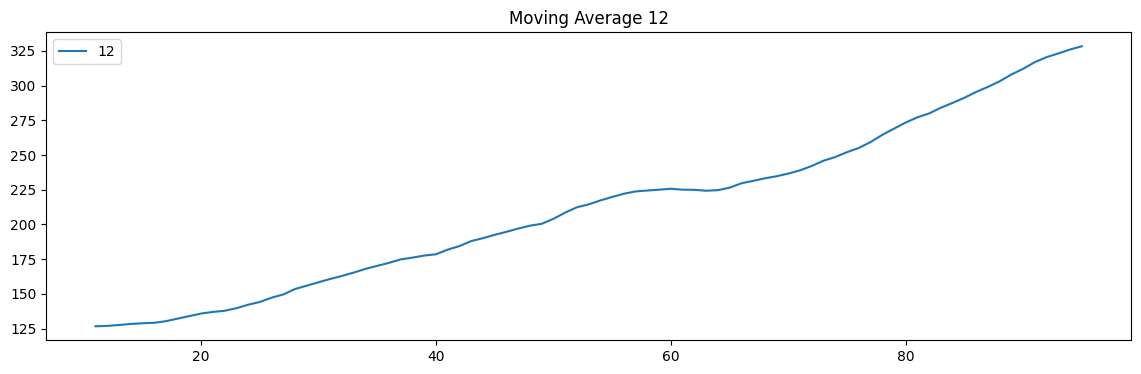

In [ ]:
plt.figure(figsize=(14,4))
air.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,13,2):
    plt.figure(figsize=(14,4))
    air["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

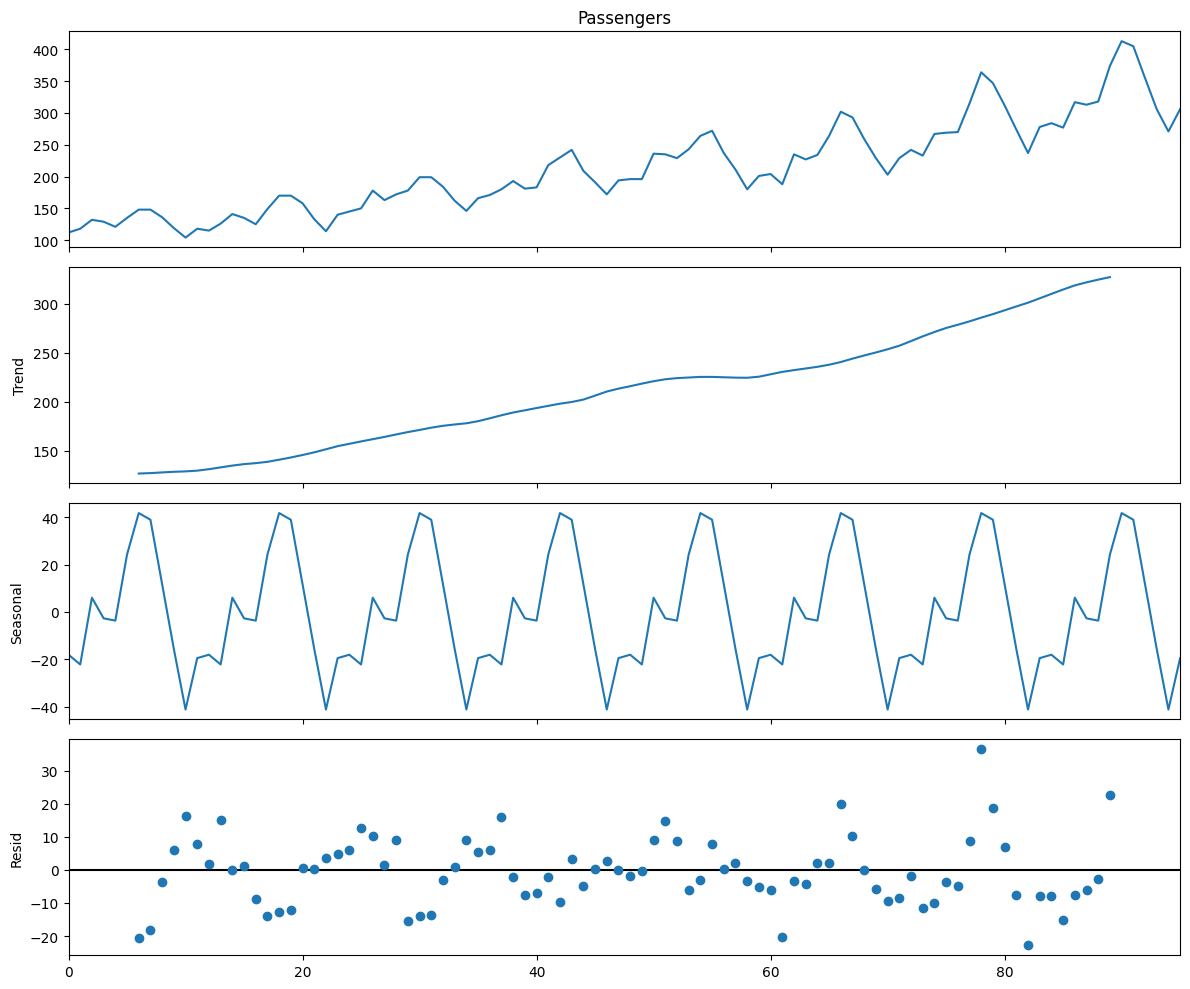

In [ ]:
decompose_ts_add = seasonal_decompose(air.Passengers, period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

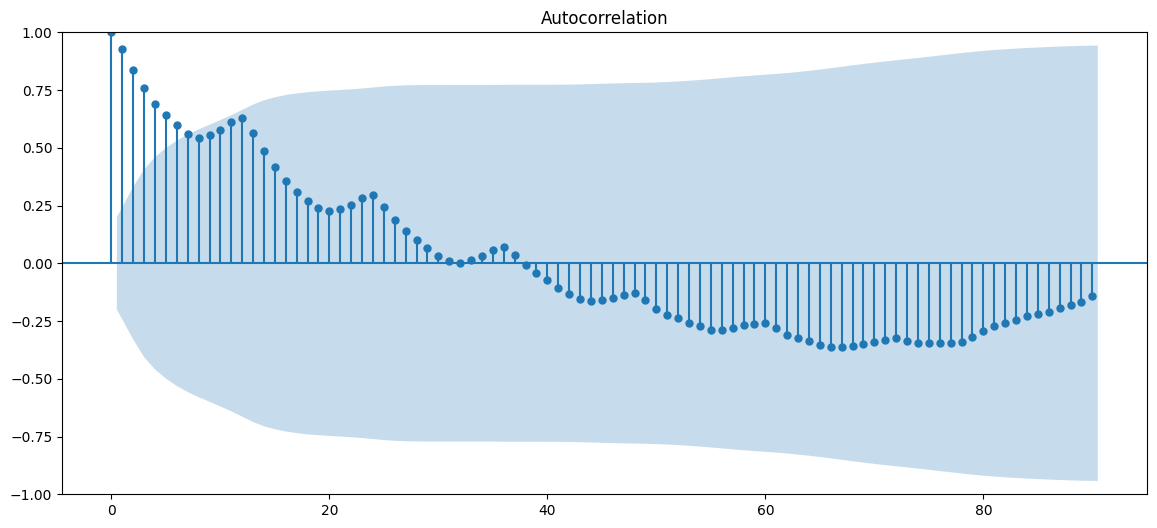

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(air.Passengers, lags=90)
    plt.show()

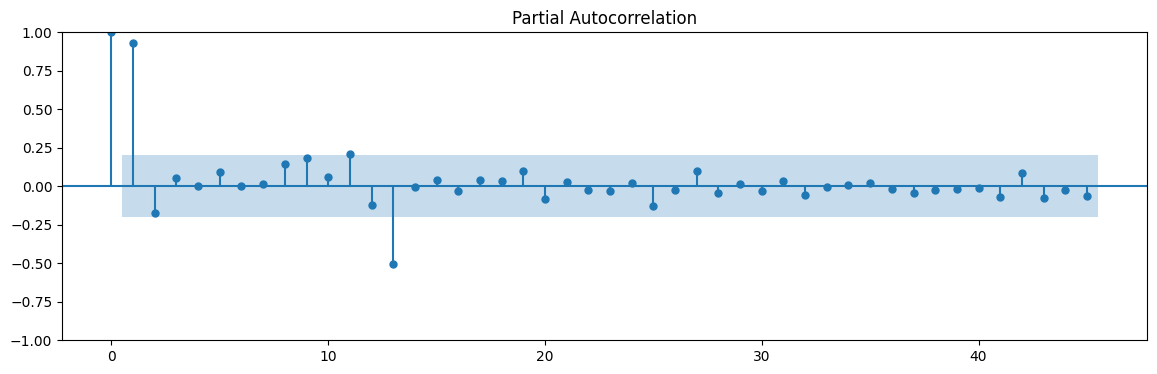

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_pacf(air.Passengers,lags=45)
    plt.show()

In [ ]:
# Creating t variable column which is time period and its squared values as t_squared, log of Passengers column as log_passengers for diff models

In [20]:
airline2 = airline.copy()
airline2.reset_index(inplace=True)
airline2['t'] = np.arange(1,len(airline2)+1)
airline2['t_squared'] = np.square(airline2.t)
airline2["month"] = airline2.Date.dt.strftime("%b") # month extraction
airline2["year"] = airline2.Date.dt.strftime("%Y")  # year extraction
months = pd.get_dummies(airline2['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
airline2 = pd.concat([airline2,months],axis=1)
airline2['log_passengers'] = np.log(airline2['Passengers'])
airline2

,Date,Passengers,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-01,355,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-01,306,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585
94,2002-11-01,271,95,9025,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0,5.602119


In [ ]:
# Dividing the data into train and test

In [24]:
train = airline2.head(77)
test = airline2.tail(19)

In [25]:
test

,Date,Passengers,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
77,2001-06-01,315,78,6084,Jun,2001,0,0,0,0,0,1,0,0,0,0,0,0,5.752573
78,2001-07-01,364,79,6241,Jul,2001,0,0,0,0,0,0,1,0,0,0,0,0,5.897154
79,2001-08-01,347,80,6400,Aug,2001,0,0,0,0,0,0,0,1,0,0,0,0,5.849325
80,2001-09-01,312,81,6561,Sep,2001,0,0,0,0,0,0,0,0,1,0,0,0,5.743003
81,2001-10-01,274,82,6724,Oct,2001,0,0,0,0,0,0,0,0,0,1,0,0,5.613128
82,2001-11-01,237,83,6889,Nov,2001,0,0,0,0,0,0,0,0,0,0,1,0,5.468060
83,2001-12-01,278,84,7056,Dec,2001,0,0,0,0,0,0,0,0,0,0,0,1,5.627621
84,2002-01-01,284,85,7225,Jan,2002,1,0,0,0,0,0,0,0,0,0,0,0,5.648974
85,2002-02-01,277,86,7396,Feb,2002,0,1,0,0,0,0,0,0,0,0,0,0,5.624018
86,2002-03-01,317,87,7569,Mar,2002,0,0,1,0,0,0,0,0,0,0,0,0,5.758902


In [26]:
train

,Date,Passengers,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2001-01-01,242,73,5329,Jan,2001,1,0,0,0,0,0,0,0,0,0,0,0,5.488938
73,2001-02-01,233,74,5476,Feb,2001,0,1,0,0,0,0,0,0,0,0,0,0,5.451038
74,2001-03-01,267,75,5625,Mar,2001,0,0,1,0,0,0,0,0,0,0,0,0,5.587249
75,2001-04-01,269,76,5776,Apr,2001,0,0,0,1,0,0,0,0,0,0,0,0,5.594711


In [ ]:
# Creating models with smf ols method

In [27]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.14854431950878

In [28]:
#Exponential Model

Exp = smf.ols('log_passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


47.889654251840064

In [37]:
#Quadratic

Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.92632852818895

In [38]:
#Additive seasonality

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

133.31540360112714

In [32]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.61752923079128

In [33]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

138.7571524741708

In [34]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

12.183266271786238

In [39]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,12.183266
4,rmse_add_sea_quad,39.617529
1,rmse_Exp,47.889654
0,rmse_linear,58.148544
2,rmse_Quad,58.926329
3,rmse_add_sea,133.315404
5,rmse_Mult_sea,138.757152


In [ ]:
# Since we get lowest rmse value for the multiplicative additive seasonality model, we shall go with this model to make the predictions

In [40]:
pred_Mult_add_sea

77    5.721300
78    5.822344
79    5.830753
80    5.723450
81    5.596369
82    5.466858
83    5.602082
84    5.625437
85    5.641030
86    5.785394
87    5.749662
88    5.739944
89    5.853838
90    5.954882
91    5.963291
92    5.855988
93    5.728907
94    5.599395
95    5.734620
dtype: float64

In [41]:
np.exp(pred_Mult_add_sea)

77    305.301671
78    337.762784
79    340.615176
80    305.958668
81    269.446293
82    236.715156
83    270.990018
84    277.393387
85    281.752764
86    325.510244
87    314.084631
88    311.046903
89    348.569658
90    385.631227
91    388.887865
92    349.319765
93    307.632781
94    270.262919
95    309.395285
dtype: float64

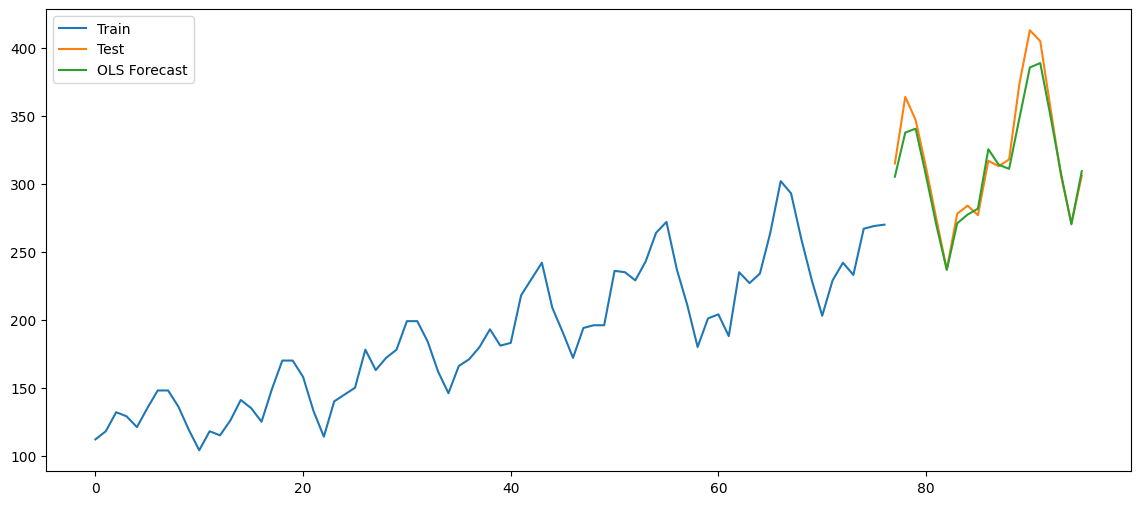

In [42]:
plt.figure(figsize=(14,6))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(np.exp(pred_Mult_add_sea), label='OLS Forecast')
plt.legend(loc='best')
plt.show()